In [35]:
%pylab inline

rcParams["figure.figsize"] = (12, 9) #<--- large default figures

# Plot text elements
rcParams['axes.labelsize'] = 17
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

Populating the interactive namespace from numpy and matplotlib


# 1. Read tweets appearing on homepage

In [36]:
import tweepy

consumer_key = 'JElhoUDXi9BFsfCTVERhc9Vb1'
consumer_secret = 'CPws1P5KCYWbVePYKN0FpBmiSV1hvcow4x4O1lwRS4G1U31Jxl'

access_token ='3773670734-SHThwjiBZVvI34rdjWn7lGgCAM2YHLOL0OPCrrC'
access_token_secret = 'gGHhMkrKCOVQhvMRTOB0asLE7ZFIsNmcjN8s0rAZIqY07'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for (idx, tweet) in enumerate(public_tweets[0:3]): #First 3 tweets in my public feed
    print ('TWEET', idx, ': ', tweet.text)

TWEET 0 :  RT @donaldorth: @USFWS to hire many fish and wildlife biologists 
Apply by Nov 18 via https://t.co/S4smRAmkyp
TWEET 1 :  Islamic State hits back in Mosul but faces new Raqqa front https://t.co/FJgiY5hswp https://t.co/L5q52Nm2sK
TWEET 2 :  FBI Now Investigating Its Own Bad Tweets https://t.co/nwL8eQWlFK https://t.co/sJ7CaBTs3p


In [37]:
# When we use tweet.text, we implicitly use a python class defined by tweepy
type(tweet)

tweepy.models.Status

In [38]:
# There are many attributes associated with a Status object.
tweet.__dict__.keys()

dict_keys(['possibly_sensitive_appealable', 'in_reply_to_user_id', 'in_reply_to_status_id_str', 'favorited', 'is_quote_status', 'place', 'author', 'source_url', 'created_at', 'retweeted', 'truncated', 'geo', 'in_reply_to_screen_name', '_json', 'in_reply_to_user_id_str', '_api', 'contributors', 'id', 'lang', 'entities', 'in_reply_to_status_id', 'extended_entities', 'source', 'text', 'id_str', 'retweet_count', 'coordinates', 'possibly_sensitive', 'favorite_count', 'user'])

# 2. Return the top 10 trending topics for a specific location 

Where the location is a WOEID (Yahoo Where on Earth ID). WOEID's are unique identifiers, similar to zipcodes, but that expand worldwide. Austin, Texas (Travis County) has WOEID: 2357536. 

Search for WOEID's here: http://woeid.rosselliot.co.nz/

In [39]:
# Top 10 trending topics in Austin:
top10 = api.trends_place(id=2357536)
top10

# The result is a JSON object. JSON is a human and machine-readable standardized data encoding format.
# In Python, JSON objects are implemented as lists of nested dictionaries. 
# JSON stands for JavaScript Object Notation, because it's designed based on a subset of the JavaScript language; 
# however, JSON is a data-encoding format implemented in many languages.

[{'as_of': '2016-11-06T23:46:51Z',
  'created_at': '2016-11-06T23:39:02Z',
  'locations': [{'name': 'Austin', 'woeid': 2357536}],
  'trends': [{'name': '#HookEm',
    'promoted_content': None,
    'query': '%23HookEm',
    'tweet_volume': None,
    'url': 'http://twitter.com/search?q=%23HookEm'},
   {'name': 'Trump',
    'promoted_content': None,
    'query': 'Trump',
    'tweet_volume': 3760865,
    'url': 'http://twitter.com/search?q=Trump'},
   {'name': '#INDvsGB',
    'promoted_content': None,
    'query': '%23INDvsGB',
    'tweet_volume': 18484,
    'url': 'http://twitter.com/search?q=%23INDvsGB'},
   {'name': 'Golden Tate',
    'promoted_content': None,
    'query': '%22Golden+Tate%22',
    'tweet_volume': 28711,
    'url': 'http://twitter.com/search?q=%22Golden+Tate%22'},
   {'name': 'Mark Ingram',
    'promoted_content': None,
    'query': '%22Mark+Ingram%22',
    'tweet_volume': None,
    'url': 'http://twitter.com/search?q=%22Mark+Ingram%22'},
   {'name': '#askcon',
    'prom

In [40]:
# The top ten tweet names can be pulled out from the 'trends' list, 
# which is a list of only one element
top10[0]['trends']

[{'name': '#HookEm',
  'promoted_content': None,
  'query': '%23HookEm',
  'tweet_volume': None,
  'url': 'http://twitter.com/search?q=%23HookEm'},
 {'name': 'Trump',
  'promoted_content': None,
  'query': 'Trump',
  'tweet_volume': 3760865,
  'url': 'http://twitter.com/search?q=Trump'},
 {'name': '#INDvsGB',
  'promoted_content': None,
  'query': '%23INDvsGB',
  'tweet_volume': 18484,
  'url': 'http://twitter.com/search?q=%23INDvsGB'},
 {'name': 'Golden Tate',
  'promoted_content': None,
  'query': '%22Golden+Tate%22',
  'tweet_volume': 28711,
  'url': 'http://twitter.com/search?q=%22Golden+Tate%22'},
 {'name': 'Mark Ingram',
  'promoted_content': None,
  'query': '%22Mark+Ingram%22',
  'tweet_volume': None,
  'url': 'http://twitter.com/search?q=%22Mark+Ingram%22'},
 {'name': '#askcon',
  'promoted_content': None,
  'query': '%23askcon',
  'tweet_volume': 14744,
  'url': 'http://twitter.com/search?q=%23askcon'},
 {'name': '#Eagles',
  'promoted_content': None,
  'query': '%23Eagles',


In [41]:
for trend in top10[0]['trends']:
    print (trend['name'], trend['tweet_volume'])

#HookEm None
Trump 3760865
#INDvsGB 18484
Golden Tate 28711
Mark Ingram None
#askcon 14744
#Eagles 25525
Aaron Donald None
#49ers None
Rams 22916
Steelers 134442
Browns 86869
Red Bulls None
Travis Kelce 29267
Thomas Davis None
Jason Hammel None
CJ McCollum None
#MLSCupPlayoffs None
#EMAS 881523
#TENvsSD None
#Jets 11230
#DallasCowboys 48804
#MakeAMovieSarcastic None
#MarthaStewartSongs None
#USMNT None


# 3. Mine tweets using either 'search' or 'stream'
The key difference between stream and search is that stream provides new data as it comes in, while search can be used to query old data. The search API is more powerful for queries, and provides faster access to a wide-range of data.

In [42]:
clinton = api.search(q='hillary OR clinton')
print (clinton)

[Status(in_reply_to_user_id=None, in_reply_to_status_id_str=None, favorited=False, quoted_status_id_str='795411453004120064', is_quote_status=True, place=None, quoted_status_id=795411453004120064, author=User(profile_banner_url='https://pbs.twimg.com/profile_banners/885480031/1353597566', profile_sidebar_border_color='C0DEED', followers_count=7248, url=None, verified=False, favourites_count=189, friends_count=7615, profile_text_color='333333', created_at=datetime.datetime(2012, 10, 16, 22, 41, 38), profile_use_background_image=True, contributors_enabled=False, follow_request_sent=False, default_profile=True, profile_sidebar_fill_color='DDEEF6', listed_count=94, name='Jacob Botzman', translator_type='none', is_translator=False, protected=False, profile_background_tile=False, lang='en', screen_name='JacobBotzman', has_extended_profile=False, profile_background_color='C0DEED', _api=<tweepy.api.API object at 0x1169c0e80>, profile_link_color='1DA1F2', profile_background_image_url_https='htt

In [12]:
trump = api.search(q='donald OR trump')

In [43]:
from IPython.display import Image
Image('http://www.slaw.ca/wp-content/uploads/2011/11/map-of-a-tweet-copy.png')

In [43]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

In [73]:
print api.rate_limit_status()

SyntaxError: invalid syntax (<ipython-input-73-5bf3411a2c6a>, line 1)

In [81]:
# The following code is taken from Alexander Galea's blog:
# https://galeascience.wordpress.com/2016/03/18/collecting-twitter-data-with-python/

import tweepy
from tweepy import OAuthHandler
import json
import datetime as dt
import time
import os
import sys


'''
The main() function can be run by executing the command: 
python twitter_search.py
'''

def load_api():
    ''' Function that loads the twitter API after authorizing the user. '''

    consumer_key = 'JElhoUDXi9BFsfCTVERhc9Vb1'
    consumer_secret = 'CPws1P5KCYWbVePYKN0FpBmiSV1hvcow4x4O1lwRS4G1U31Jxl'
    access_token = '3773670734-SHThwjiBZVvI34rdjWn7lGgCAM2YHLOL0OPCrrC'
    access_secret = 'gGHhMkrKCOVQhvMRTOB0asLE7ZFIsNmcjN8s0rAZIqY07'
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    # load the twitter API via tweepy
    api = tweepy.API(auth)
    return api
    # show the tweepy rate limits
    print (api.rate_limit_status())

    
def tweet_search(api, query, max_tweets, max_id, since_id, geocode):
    ''' Function that takes in a search string 'query', the maximum
        number of tweets 'max_tweets', and the minimum (i.e., starting)
        tweet id. It returns a list of tweepy.models.Status objects. '''

    searched_tweets = []
    while len(searched_tweets) < max_tweets:
        remaining_tweets = max_tweets - len(searched_tweets)
        try:
            new_tweets = api.search(q=query, count=remaining_tweets,
                                    since_id=str(since_id),
				                    max_id=str(max_id-1))
#                                    geocode=geocode)
            print('found',len(new_tweets),'tweets')
            if not new_tweets:
                print('no tweets found')
                break
            searched_tweets.extend(new_tweets)
            max_id = new_tweets[-1].id
        except tweepy.TweepError:
            print('exception raised, waiting 15 minutes')
            print('(until:', dt.datetime.now()+dt.timedelta(minutes=15), ')')
            time.sleep(15*60)
            break # stop the loop
    return searched_tweets, max_id


def get_tweet_id(api, date='', days_ago=9, query='a'):
    ''' Function that gets the ID of a tweet. This ID can then be
        used as a 'starting point' from which to search. The query is
        required and has been set to a commonly used word by default.
        The variable 'days_ago' has been initialized to the maximum
        amount we are able to search back in time (9).'''

    if date:
        # return an ID from the start of the given day
        td = date + dt.timedelta(days=1)
        tweet_date = '{0}-{1:0>2}-{2:0>2}'.format(td.year, td.month, td.day)
        tweet = api.search(q=query, count=1, until=tweet_date)
    else:
        # return an ID from __ days ago
        td = dt.datetime.now() - dt.timedelta(days=days_ago)
        tweet_date = '{0}-{1:0>2}-{2:0>2}'.format(td.year, td.month, td.day)
        # get list of up to 10 tweets
        tweet = api.search(q=query, count=10, until=tweet_date)
        print('search limit (start/stop):',tweet[0].created_at)
        # return the id of the first tweet in the list
        return tweet[0].id


def write_tweets(tweets, filename):
    ''' Function that appends tweets to a file. '''

    with open(filename, 'a') as f:
        for tweet in tweets:
            json.dump(tweet._json, f)
            f.write('\n')


def main():
    ''' This is a script that continuously searches for tweets
        that were created over a given number of days. The search
        dates and search phrase can be changed below. '''



    ''' search variables: '''
    search_phrases = ['#imwithher', 
                      '#makeamericagreatagain']
    
    time_limit = 0.01                           # runtime limit in hours
    max_tweets = 100                           # number of tweets per search (will be
                                               # iterated over) - maximum is 100
    min_days_old, max_days_old = 7, 8          # search limits e.g., from 7 to 8
                                               # gives current weekday from last week,
                                               # min_days_old=0 will search from right now
    USA = '39.8,-95.583068847656,2500km'       # this geocode includes nearly all American
                                               # states (and a large portion of Canada)
    

    # loop over search items,
    # creating a new file for each
    for search_phrase in search_phrases:

        print('Search phrase =', search_phrase)

        ''' other variables '''
        name = search_phrase.split()[0]
        json_file_root = name + '/'  + name
        os.makedirs(os.path.dirname(json_file_root), exist_ok=True)
        read_IDs = False
        
        # open a file in which to store the tweets
        if max_days_old - min_days_old == 1:
            d = dt.datetime.now() - dt.timedelta(days=min_days_old)
            day = '{0}-{1:0>2}-{2:0>2}'.format(d.year, d.month, d.day)
        else:
            d1 = dt.datetime.now() - dt.timedelta(days=max_days_old-1)
            d2 = dt.datetime.now() - dt.timedelta(days=min_days_old)
            day = '{0}-{1:0>2}-{2:0>2}_to_{3}-{4:0>2}-{5:0>2}'.format(
                  d1.year, d1.month, d1.day, d2.year, d2.month, d2.day)
        json_file = json_file_root + '_' + day + '.json'
        if os.path.isfile(json_file):
            print('Appending tweets to file named: ',json_file)
            read_IDs = True
        
        # authorize and load the twitter API
        api = load_api()
        
        # set the 'starting point' ID for tweet collection
        if read_IDs:
            # open the json file and get the latest tweet ID
            with open(json_file, 'r') as f:
                lines = f.readlines()
                max_id = json.loads(lines[-1])['id']
                print('Searching from the bottom ID in file')
        else:
            # get the ID of a tweet that is min_days_old
            if min_days_old == 0:
                max_id = -1
            else:
                max_id = get_tweet_id(api, days_ago=(min_days_old-1))
        # set the smallest ID to search for
        since_id = get_tweet_id(api, days_ago=(max_days_old-1))
        print('max id (starting point) =', max_id)
        print('since id (ending point) =', since_id)
        


        ''' tweet gathering loop  '''
        start = dt.datetime.now()
        end = start + dt.timedelta(hours=time_limit)
        count, exitcount = 0, 0
        while dt.datetime.now() < end:
            count += 1
            print('count =',count)
            # collect tweets and update max_id
            tweets, max_id = tweet_search(api, search_phrase, max_tweets,
                                          max_id=max_id, since_id=since_id,
                                          geocode=USA)
            # write tweets to file in JSON format
            if tweets:
                write_tweets(tweets, json_file)
                exitcount = 0
            else:
                exitcount += 1
                if exitcount == 3:
                    if search_phrase == search_phrases[-1]:
                        sys.exit('Maximum number of empty tweet strings reached - exiting')
                    else:
                        print('Maximum number of empty tweet strings reached - breaking')
                        break


if __name__ == "__main__":
    main()

Search phrase = #imwithher
search limit (start/stop): 2016-10-31 23:59:59
search limit (start/stop): 2016-10-30 23:59:59
max id (starting point) = 793241139398578176
since id (ending point) = 792878751541583873
count = 1
found 100 tweets
count = 2
found 100 tweets
count = 3
found 100 tweets
count = 4
found 100 tweets
count = 5
found 100 tweets
count = 6
found 100 tweets
count = 7
found 100 tweets
count = 8
found 100 tweets
count = 9
found 100 tweets
count = 10
found 100 tweets
count = 11
found 100 tweets
count = 12
found 100 tweets
count = 13
found 100 tweets
count = 14
found 100 tweets
count = 15
found 100 tweets
count = 16
found 100 tweets
count = 17
found 100 tweets
count = 18
found 100 tweets
count = 19
found 100 tweets
count = 20
found 100 tweets
count = 21
found 100 tweets
count = 22
found 100 tweets
count = 23
found 100 tweets
count = 24
found 100 tweets
count = 25
found 100 tweets
count = 26
found 100 tweets
count = 27
found 100 tweets
count = 28
found 100 tweets
count = 29
fou

In [79]:
'''
consumer_key = 'JElhoUDXi9BFsfCTVERhc9Vb1'
consumer_secret = 'CPws1P5KCYWbVePYKN0FpBmiSV1hvcow4x4O1lwRS4G1U31Jxl'
access_token = '3773670734-SHThwjiBZVvI34rdjWn7lGgCAM2YHLOL0OPCrrC'
access_secret = 'gGHhMkrKCOVQhvMRTOB0asLE7ZFIsNmcjN8s0rAZIqY07'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# load the twitter API via tweepy
api = tweepy.API(auth)

# show the tweepy rate limits
print (api.rate_limit_status())
'''

"\nconsumer_key = 'JElhoUDXi9BFsfCTVERhc9Vb1'\nconsumer_secret = 'CPws1P5KCYWbVePYKN0FpBmiSV1hvcow4x4O1lwRS4G1U31Jxl'\naccess_token = '3773670734-SHThwjiBZVvI34rdjWn7lGgCAM2YHLOL0OPCrrC'\naccess_secret = 'gGHhMkrKCOVQhvMRTOB0asLE7ZFIsNmcjN8s0rAZIqY07'\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\n# load the twitter API via tweepy\napi = tweepy.API(auth)\n\n# show the tweepy rate limits\nprint (api.rate_limit_status())\n"

In [83]:
import json
 
tweet_files = ['#imwithher_2016-10-31.json', '#makeamericagreatagain_2016-10-31', ...]
tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets.append(json.loads(line))

FileNotFoundError: [Errno 2] No such file or directory: '#imwithher_2016-10-31.json'

In [88]:
import json
from pprint import pprint
 
tweet_files = ['#imwithher_2016-10-31.json', 'makeamericagreatagain_2016-10-31']
tweets = []

#for file in tweet_files:
#    #file = open('tweet_files', 'r')
#    file = file.read('tweet_files','r')
#    #print file.read()

with open('#imwithher_2016-10-31.json') as data_file:    
    data = json.load(data_file)

pprint(data)
    

#for file in tweet_files:
#    with open(file, 'r') as f:
#        for line in f.readlines():
#            tweets.append(json.loads(line))

FileNotFoundError: [Errno 2] No such file or directory: '#imwithher_2016-10-31.json'

In [54]:
def populate_tweet_df(tweets):
    df = pd.DataFrame()
 
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
 
    df['location'] = list(map(lambda tweet: tweet['user']['location'], tweets))
 
    df['country_code'] = list(map(lambda tweet: tweet['place']['country_code']
                                  if tweet['place'] != None else '', tweets))
 
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    return df

NameError: name 'df' is not defined

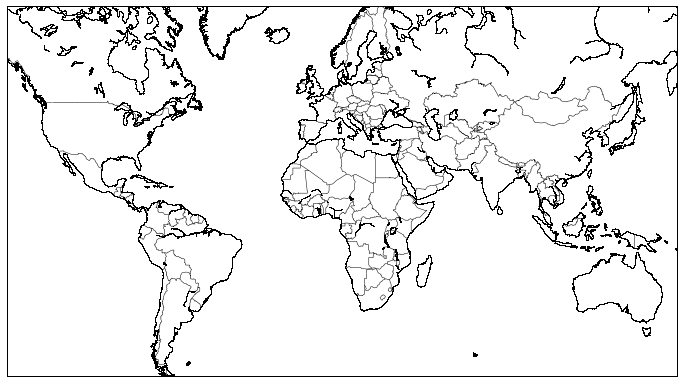

In [55]:
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
 
# plot the blank world map
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'l', area_thresh = 5000.0,
                     llcrnrlon=-140, llcrnrlat=-55,
                     urcrnrlon=160, urcrnrlat=70)
# set resolution='h' for high quality
 
# draw elements onto the world map
my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines(antialiased=False,
                      linewidth=0.005)
 
# add coordinates as red dots
longs = list(df.loc[(df.long != 'NaN')].long)
latts = list(df.loc[df.latt != 'NaN'].latt)
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=6, alpha=0.5)
 
plt.show()